In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
file_path = './TaxiData.csv'
data = pd.read_csv(file_path)

## Q 4.a Identifying Outliers in fare and tips

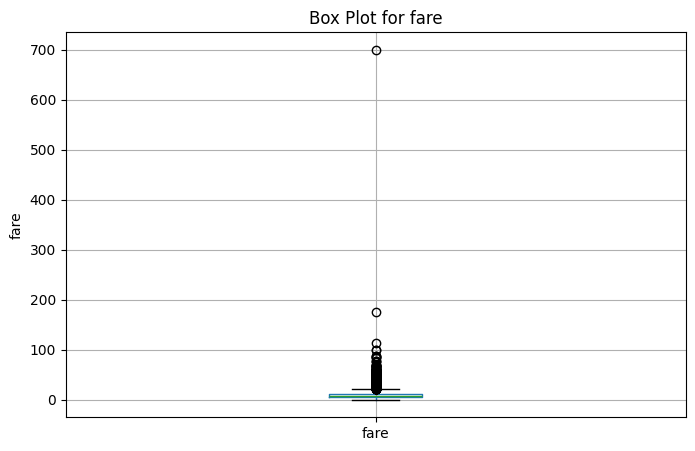

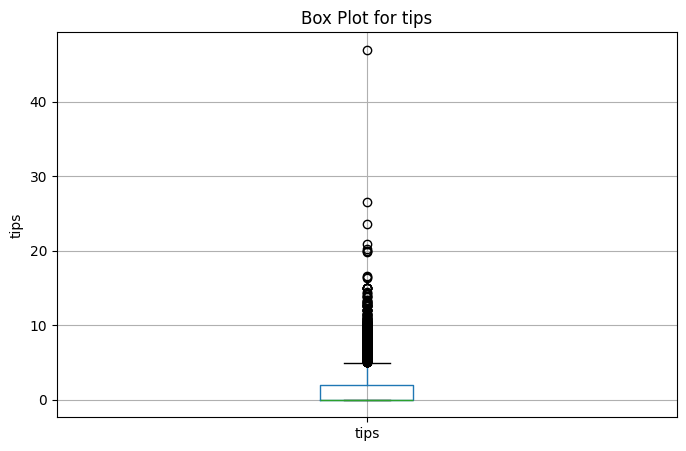

In [ ]:
# Box plots for fare and tip
numerical_columns = ['fare', 'tips']
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    data.boxplot(column=column)
    plt.title(f"Box Plot for {column}")
    plt.ylabel(column)
    plt.show()


<div>
<div>
    <h4>(a)</h4>
    In the boxplot of flare and tips,<br>
    1. The green line is the median.<br>
    2. The blue box represents 25-75 percentiles (Interquartile range).<br>
    3. The points which lie outside the black-extension lines are the outliers of data. <br>
</div>
<div>
    <h4>(b)</h4>
    Outliers can inflate the mean, making it unrepresentative of typical values.<br>
    High outliers might suggest unusual cases (e.g., very long trips, generous tipping) or data entry errors<br>
</div>
<div>
    <h4>(c)</h4>
    <h5>1. Removal</h5>
    We can exclude points lying beyond a threshold, example, 1.5 times the interquartile range (IQR).
    <h5>2. Capping/Trimming</h5>
    We may replace outliers with the maximum or minimum value within a defined range.
    <h5>3. Transformation</h5>
    We can apply mathematical transformations to reduce the influence of extreme values. For example, Log Transformation or Box-Cox Transformation.
</div>
    
</div>

## Q 4.b Predicting Fare

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np


In [4]:
def predict(data): 
    # Define predictors and target
    predictors = ['trip_miles', 'trip_seconds', 'pickup_community_area', 'dropoff_community_area']
    target = 'fare'
    # Remove rows with missing values in predictors/target
    data = data.dropna(subset=predictors + [target])
    
    # Split data into training and testing sets
    X = data[predictors]
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    print("training size:", y_train.shape[0])
    print("testing size:", y_test.shape[0])
    # Train the regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"RMSE: {rmse}")

```
We are working on the processed data (from Q1) after filling missing values.
```

In [5]:

# Load data
file_path = './Processed_TaxiData.csv'
data = pd.read_csv(file_path)

predict(data)

training size: 12001
testing size: 3001
RMSE: 6.123500066600585


<div>
<h5>Limitations and Improvements</h5>
Data Quality: Missing or inaccurate data.<br>
Non-linearity: If relationships are not linear, a linear regression model may underperform.<br>
Feature Omission: Additional factors like traffic conditions, surge pricing, or time of day might improve predictions.<br>
</div>

```
Let's cap the outliers of fare, distance, duration to see possible improvements in the predictions
```

In [6]:

# Load data
file_path = './Processed_TaxiData.csv'
data = pd.read_csv(file_path)

columns_to_cap = ['trip_miles', 'trip_seconds', 'fare']

# Function to cap outliers
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: max(min(x, upper_bound), lower_bound))

# Apply capping to each column
for col in columns_to_cap:
    cap_outliers(data, col)

predict(data)

training size: 12001
testing size: 3001
RMSE: 2.1874266173661234


```
Now let's use Box-Cox transformation for the outliers of fare, distance and duration to see possible improvements in the predictions
```

In [7]:
from scipy.stats import boxcox

# Load data
file_path = './Processed_TaxiData.csv'
data = pd.read_csv(file_path)

columns_to_transform = ['trip_miles', 'trip_seconds', 'fare']

for column in columns_to_transform:
    # Shift values if necessary (Box-Cox requires positive values)
    if (data[column] <= 0).any():
        min_val = data[column].min()
        data[column] = data[column] - min_val + 1  # Shift to make all values positive

    # Apply Box-Cox
    data[column], _ = boxcox(data[column])

predict(data)

training size: 12001
testing size: 3001
RMSE: 0.09915747826838217
